**Applying the Logistic Regression Model to a loan prediction system to predict if a loan will get approved or not**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("../input/train_u6lujuX_CVtuZ9i (1).csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
dataset.shape

(614, 13)

    1. Total  number of records present in the dataset - 614
    2. Total number of columns present in the dataset - 13

In [3]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


    The above description shows the following things:
    * LoanAmount Column is has 22 missing values
    * Credit_history columns has  50 missing values
    * Loan_Amount_Term has 14 missing values
    * The mean of the Credit_history is 0.84 i.e. 84%

In [4]:
print (dataset['Property_Area'].value_counts())
print (dataset['Education'].value_counts())
print (dataset['Gender'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64


    The above are the counts for the non-numeric columns like "Property_Area", "Education" and "Gender" . Lets start by plotting the required variables - ApplicantIncome and LoanAmount

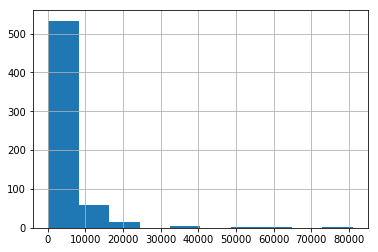

In [5]:
dataset['ApplicantIncome'].hist()

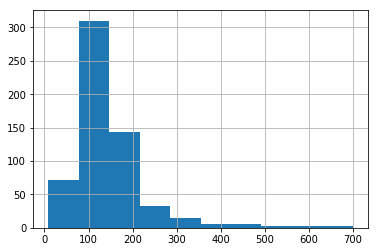

In [6]:
dataset['LoanAmount'].hist()

    Lets understand the distributions of ApplicantIncome and LoanAmount. Also Lets understand the categorical variables in more detail

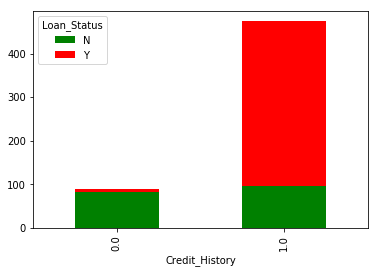

In [7]:
temp3 = pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['green','red'], grid=False)

    lets check the missing values in the dataset.

In [8]:
dataset.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Lets fill the missing values by the "mean"

In [9]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)
dataset['Self_Employed'].fillna('No',inplace=True)
dataset['Married'].fillna('NA',inplace=True)
dataset['Gender'].fillna('NA',inplace=True)
dataset['Dependents'].fillna('0',inplace=True)
dataset['Credit_History'].fillna('0.0',inplace=True)

   Lets try to minimize the effect of the outliers by applying the "log" function

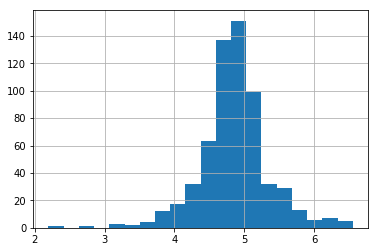

In [10]:
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

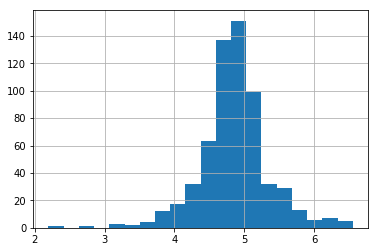

In [11]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'])
dataset['LoanAmount_log'].hist(bins=20) 

    Lets encode the non-numeric data

In [12]:
from sklearn.preprocessing import LabelEncoder
#var_mod = ['Married'] #Dependents
var_mod = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
#dataset.Loan_Status.unique()
le = LabelEncoder()
for i in var_mod:
    dataset[i] = le.fit_transform(dataset[i])
dataset.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

    Lets apply the Logistic Regression Model

In [13]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split #For K-fold cross validation
#from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = LogisticRegression()
X = dataset['Credit_History'].values
Y = dataset['Loan_Status'].values
X = X.reshape(X.shape[0],1)

model.fit(X,Y)
#Make predictions on training set:
predictions = model.predict(X)

#Print accuracy
accuracy = metrics.accuracy_score(predictions,Y)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 77.036%


    lets perform cross validation

In [14]:
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.770386039133


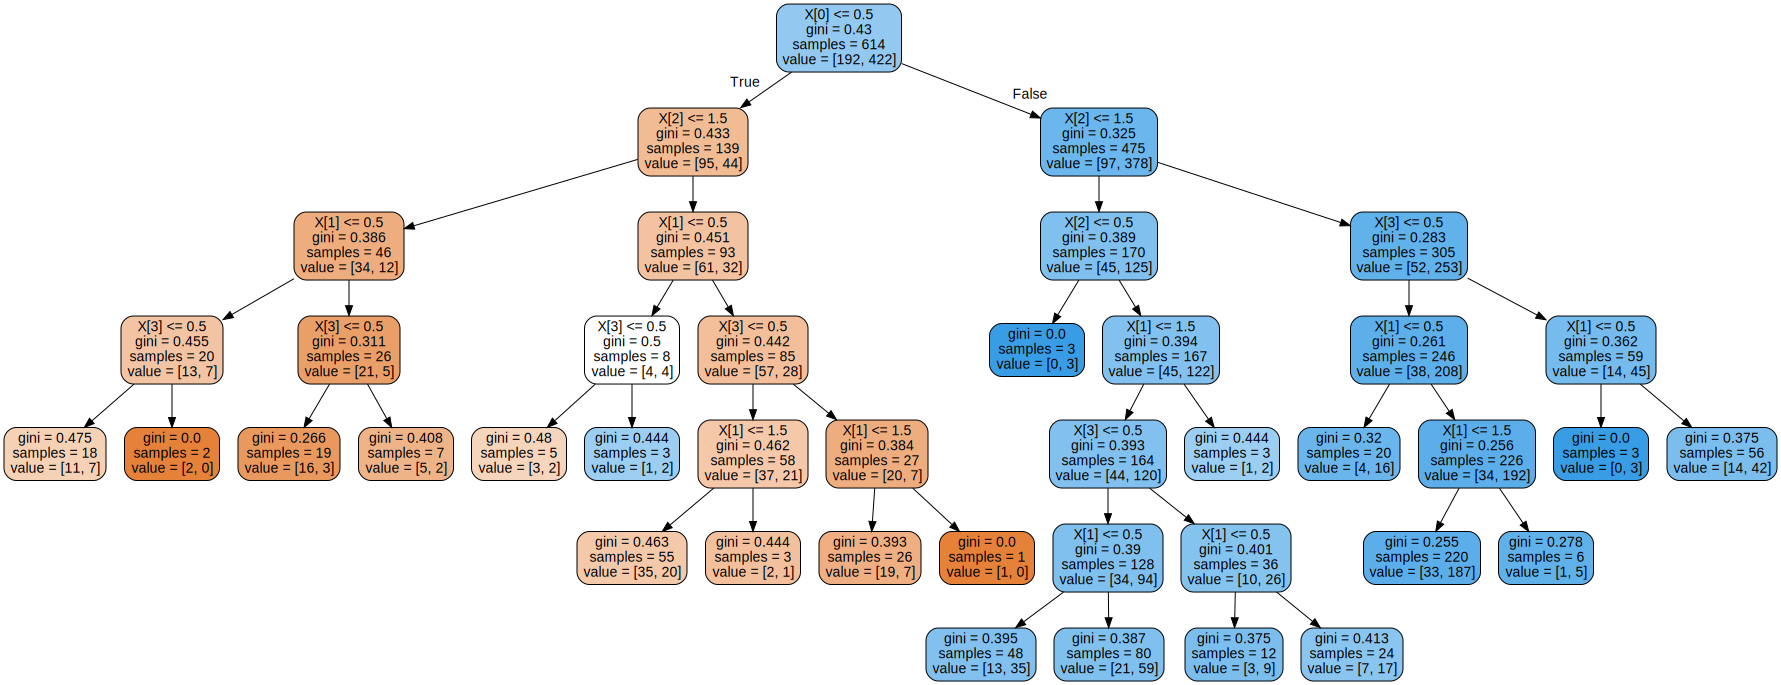

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

X = dataset[['Credit_History','Gender','Married','Education']].values
Y = dataset['Loan_Status'].values
#X = X.reshape(X.shape[0],1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=None,  
                        class_names=None,  
                         filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph 